In [1]:
# Understanding the Sortino Ratio:
# What is the Sortino Ratio?

# The Sortino ratio is a risk-adjustment metric used to determine the additional return for each unit of downside risk. It is computed by first finding the difference between an investment’s average return rate and the risk-free rate. The result is then divided by the standard deviation of negative returns. Ideally, a high Sortino ratio is preferred, 
# as it indicates that an investor will earn a higher return for each unit of a downside risk.

In [2]:
# The Sortino ratio is an improvement of the Sharpe ratio, another metric that helps individuals gauge the performance of an investment when it has been adjusted for risk. 
# What sets the Sortino ratio apart is that it acknowledges the difference between upside and downward risks. More specifically, it provides an accurate rate of return, given the likelihood of downside risk, while the Sharpe ratio treats both upside and downside risks equally.

# How to Calculate the Sortino Ratio

# The formula for calculating the Sortino ratio is:

# Sortino Ratio = (Average Realized Return – Expected Rate of Return) / Downside Risk Deviation

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [ ]:
# Import all cvs files (4 stocks, ETF, and 10yr T-Bill)

In [ ]:
shel_df = pd.read_csv(Path('data/SHEL_5yr_time_series.csv'), 
                index_col = 'Date',
                parse_dates = True,
                infer_datetime_format = True,                      
                     )
shel_df = shel_df["Adj Close"]

In [ ]:
xom_df = pd.read_csv(Path('data/XOM_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
xom_df = xom_df["Adj Close"]

In [ ]:
cvx_df = pd.read_csv(Path('data/CVX_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cvx_df = cvx_df["Adj Close"]

In [ ]:
cop_df = pd.read_csv(Path('data/COP_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cop_df = cop_df["Adj Close"]

In [ ]:
ixc_df = pd.read_csv(Path('data/IXC_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
ixc_df = ixc_df["Adj Close"]

In [ ]:

treasury_df = pd.read_csv(Path('data/10_yr_treasury_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
treasury_df = treasury_df["Adj Close"]

In [ ]:
energy_stocks_df = pd.concat([shel_df, cop_df,cvx_df,xom_df,ixc_df],
                            axis=1)
energy_stocks_df=energy_stocks_df.set_axis(['SHEL', 'COP', 'CVX','XOM', 'IXC'], axis=1)

In [ ]:
display(energy_stocks_df.head())
display(energy_stocks_df.tail())


,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,49.569248,43.725098,92.921890,64.010841,27.338148
2017-11-01,50.426472,43.726921,95.407494,63.964775,27.707043
2017-12-01,53.255947,47.173164,101.318382,64.828041,28.508978
2018-01-01,56.074009,50.542061,101.447868,67.664841,29.981033
2018-02-01,50.509724,46.674702,90.578758,58.704857,27.226599


,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2022-05-01,58.160614,108.933136,171.674988,94.112198,39.707764
2022-06-01,51.797909,87.461830,143.476334,84.815910,33.274773
2022-07-01,52.877651,95.618851,162.305252,95.997269,36.250000
2022-08-01,52.481411,107.415405,156.636765,94.670158,36.900002
2022-09-01,49.759998,100.889244,143.669998,87.309998,33.330002


In [ ]:
# Calculating Pct Change for each stock and ETF

energy_stocks_returns = energy_stocks_df.pct_change().dropna()
energy_stocks_returns.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-11-01,0.017293,0.000042,0.026749,-0.000720,0.013494
2017-12-01,0.056111,0.078813,0.061954,0.013496,0.028943
2018-01-01,0.052915,0.071416,0.001278,0.043759,0.051635
2018-02-01,-0.099231,-0.076518,-0.107140,-0.132417,-0.091873
2018-03-01,0.023208,0.097571,0.029085,-0.004846,0.017061


<AxesSubplot:title={'center':'Box Plot of Returns'}>

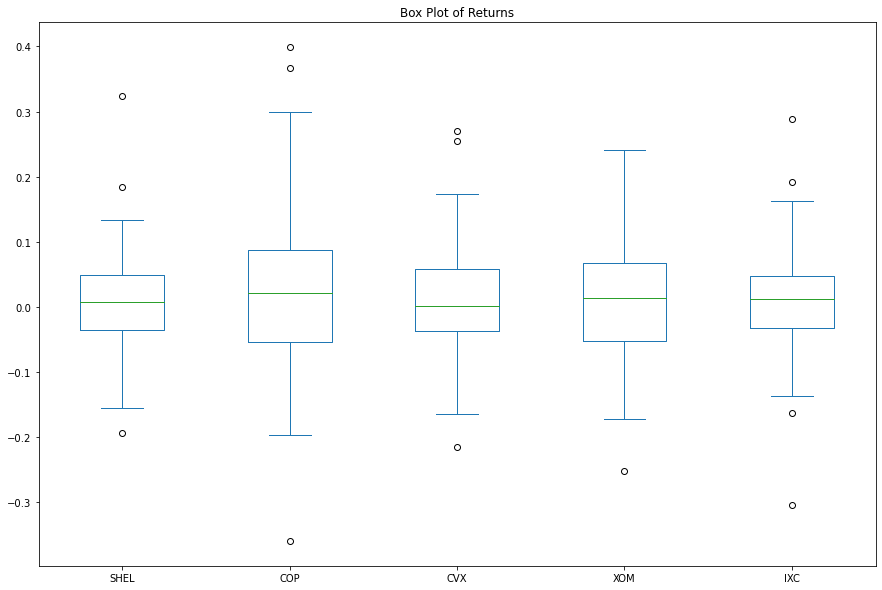

In [ ]:
energy_stocks_returns.plot.box(figsize=(15,10), title="Box Plot of Returns")

In [ ]:
#Get the Risk Free Rate from treasury_df
risk_free_rate = treasury_df.mean() / 100

risk_free_rate

0.019737833333333326

In [19]:
# Sortino ratio for shell

# Step 1: Calculating the excess returns 

shell_returns = shel_df.pct_change().dropna()

# Step 2: Calulcating negative excess returns

boolean_filter = shell_returns < 0
Negative_excess_shell_returns = shell_returns.loc[boolean_filter]
Negative_excess_shell_returns.head()

Date
2018-02-01   -0.099231
2018-05-01   -0.004578
2018-07-01   -0.012422
2018-08-01   -0.045926
2018-10-01   -0.072645
Name: Adj Close, dtype: float64

In [20]:
# Step 3: Calculate and Annualizing downside Standard Deviation

annualized_shell_SD_downside_returns = Negative_excess_shell_returns.std() * np.sqrt(12)

# Step 4: Calculating the annualized stock avg return
annualized_shell_stock_avg_returns= shell_returns.mean() * 12

# Step 5: Calculating the Sortino ratio

Sortino_ratio_shell= annualized_shell_stock_avg_returns - risk_free_rate /annualized_shell_SD_downside_returns
Sortino_ratio_shell



-0.07138219885374748

In [21]:
#Sortino ratio for Chevron

# Step 1: Calculating the excess returns 

chev_returns = cvx_df.pct_change().dropna()

# Step 2: Calulcating negative excess returns

boolean_filter = chev_returns < 0
Negative_excess_chev_returns = chev_returns.loc[boolean_filter]
Negative_excess_chev_returns.head()


Date
2018-02-01   -0.107140
2018-05-01   -0.006474
2018-07-01   -0.001266
2018-08-01   -0.061852
2018-10-01   -0.086932
Name: Adj Close, dtype: float64

In [22]:
# Step 3: Calculate and Annualizing downside Standard Deviation

annualized_chev_SD_downside_returns = Negative_excess_shell_returns.std() * np.sqrt(12)

# Step 4: Calculating average excess returns and annualizing

annualized_chev_stock_avg_returns= chev_returns.mean() * 12


# Step 5: Calculating the Sortino ratio

Sortino_ratio_chev= annualized_chev_stock_avg_returns - risk_free_rate/annualized_chev_SD_downside_returns
Sortino_ratio_chev

0.024328791931439817

In [23]:
# Sortino ratio for Exxon

# Step 1: Calculating the excess returns 

Exxon_returns = xom_df.pct_change().dropna()

# Step 2: Calulcating negative excess returns

boolean_filter = Exxon_returns < 0
Negative_excess_Exxon_returns = Exxon_returns.loc[boolean_filter]
Negative_excess_Exxon_returns.head()



Date
2017-11-01   -0.000720
2018-02-01   -0.132417
2018-03-01   -0.004846
2018-07-01   -0.014746
2018-08-01   -0.016440
Name: Adj Close, dtype: float64

In [24]:
# Step 3: Calculate and Annualizing downside Standard Deviation

annualized_exxon_SD_downside_returns = Negative_excess_Exxon_returns.std() * np.sqrt(12)

# Step 4: Calculating average excess returns and annualizing

annualized_exxon_stock_avg_returns = Exxon_returns.mean() * 12

# Step 5: Calculating the Sortino ratio

Sortino_ratio_Exxon= annualized_exxon_stock_avg_returns - risk_free_rate/annualized_exxon_SD_downside_returns 

Sortino_ratio_Exxon

0.0212169084278159

In [25]:
#Sortino ratio for Connoco

# Step 1: Calculating the excess returns 

conno_returns = cop_df.pct_change().dropna()


# Step 2: Calulcating negative excess returns

boolean_filter = conno_returns < 0
Negative_excess_conno_returns = conno_returns.loc[boolean_filter]
Negative_excess_conno_returns.head()



Date
2018-02-01   -0.076518
2018-10-01   -0.096899
2018-11-01   -0.049235
2018-12-01   -0.057872
2019-03-01   -0.011893
Name: Adj Close, dtype: float64

In [26]:
# Step 3: Calculate and Annualizing downside Standard Deviation

annualized_conno_SD_downside_returns = Negative_excess_conno_returns.std() * np.sqrt(12)

# Step 4: Calculating average excess returns and annualizing

annualized_conno_stock_avg_returns = conno_returns.mean() * 12

# Step 5: Calculating the Sortino ratio

Sortino_ratio_conno= annualized_conno_stock_avg_returns - risk_free_rate/annualized_conno_SD_downside_returns
Sortino_ratio_conno


0.19080790400680964

In [27]:
# Sortino ratio for ICX

# Step 1: Calculating the excess returns 

ETF_returns = ixc_df.pct_change().dropna()

# Step 2: Calulcating negative excess returns

boolean_filter = ETF_returns < 0
Negative_excess_ETF_returns = ETF_returns.loc[boolean_filter]
Negative_excess_ETF_returns.head()



Date
2018-02-01   -0.091873
2018-06-01   -0.002668
2018-08-01   -0.034819
2018-10-01   -0.093849
2018-11-01   -0.028379
Name: Adj Close, dtype: float64

In [28]:
# Step 3: Calculate and Annualizing downside Standard Deviation

annualized_ETF_SD_downside_returns = Negative_excess_ETF_returns.std() * np.sqrt(12)

# Step 4: Calculating average excess returns and annualizing

annualized_ETF_stock_avg_returns = ETF_returns.mean() * 12

# Step 5: Calculating the Sortino ratio

Sortino_ratio_ETF= annualized_ETF_stock_avg_returns - risk_free_rate/annualized_ETF_SD_downside_returns

Sortino_ratio_ETF


0.006888580605775713

In [29]:
data = {'Company': ['Shell','COP','CVX','XOM', 'IXC'], 
        'Sortino Ratio': [Sortino_ratio_shell, Sortino_ratio_conno , Sortino_ratio_chev, Sortino_ratio_Exxon , Sortino_ratio_ETF]}

sortino_ratios = pd.DataFrame(data, columns= ['Company','Sortino Ratio'])

%store sortino_ratios
print (sortino_ratios)




Stored 'sortino_ratios' (DataFrame)
  Company  Sortino Ratio
0   Shell      -0.071382
1     COP       0.190808
2     CVX       0.024329
3     XOM       0.021217
4     IXC       0.006889


In [30]:
sortino_ratios.sort_values(by='Sortino Ratio')


,Company,Sortino Ratio
0,Shell,-0.071382
4,IXC,0.006889
3,XOM,0.021217
2,CVX,0.024329
1,COP,0.190808


<AxesSubplot:title={'center':'Box Plot of Returns'}>

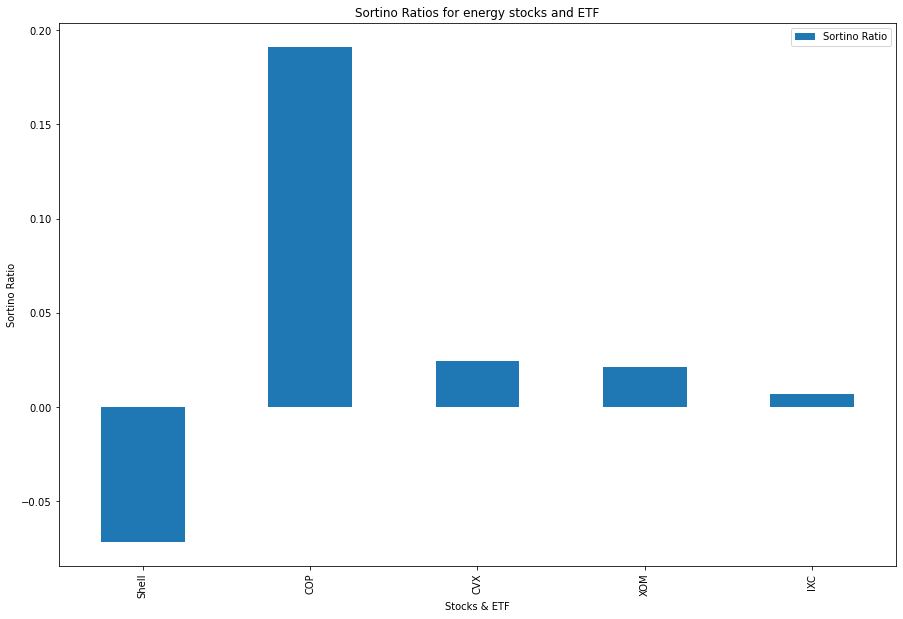

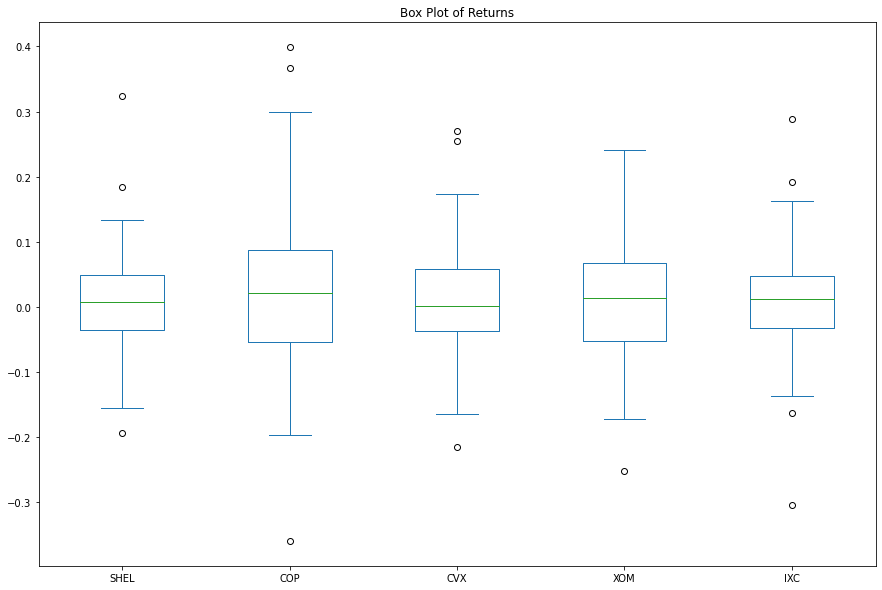

In [31]:
sortino_ratios.plot.bar(figsize=(15,10), title="Sortino Ratios for energy stocks and ETF", use_index="false", xlabel= "Stocks & ETF", x="Company", ylabel= "Sortino Ratio")
energy_stocks_returns.plot.box(figsize=(15,10), title="Box Plot of Returns")

In [32]:
# Analysis: The Sortino ratio higher than 0 is considered to be better. 
# The above plot shows that the Sortino ratio for "Conoco" is highest "0.19" compared to other stock assets and ETF. 
# We can conclude that it indicates that an investor will earn a higher return on "Conoco" of a downside risk.
# and  Investing in "Conoco" may have a greater chance to avoid large losses. 